In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV



In [7]:
insta = pd.read_csv('c:/Users/Dell/Downloads/instagram_like_data.csv')
insta.head()

,Followers,Hours Since Posted,Caption Length,Likes
0,15895,38,192,2508
1,960,25,179,980
2,76920,18,192,5822
3,54986,66,168,2026
4,6365,54,99,226


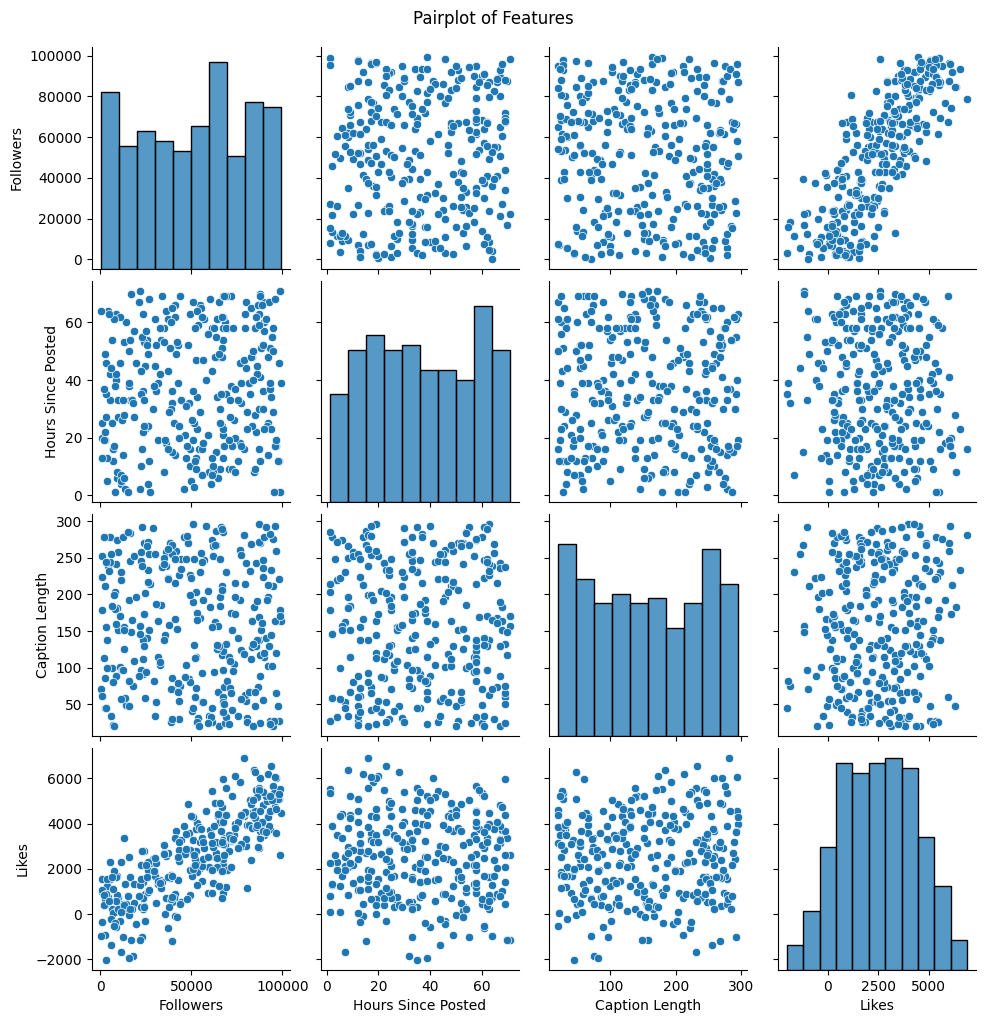

In [8]:
# 📊 Step 3: Visualize Pairwise Correlations
sns.pairplot(insta)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

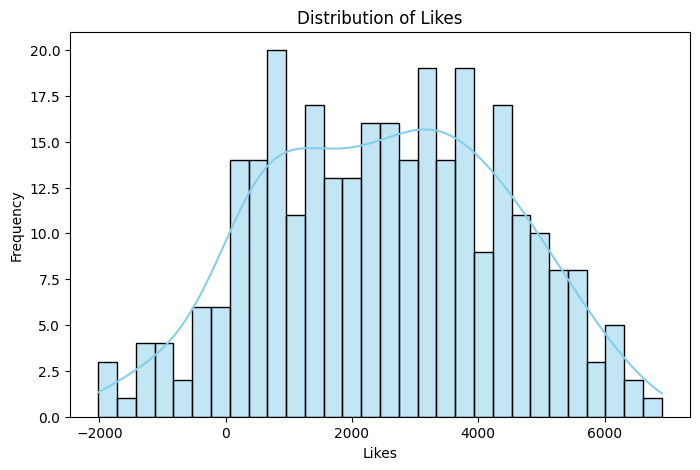

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(insta['Likes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

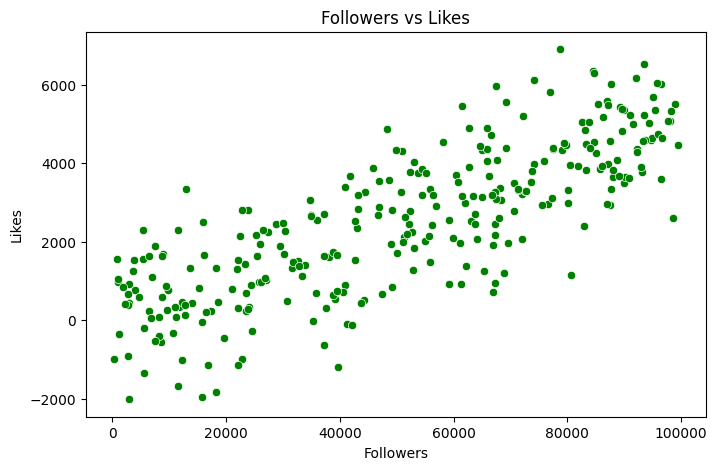

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Followers', y='Likes', data=insta, color='green')
plt.title('Followers vs Likes')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

In [12]:
features = insta[['Followers', 'Hours Since Posted', 'Caption Length']]
target = insta['Likes']



In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.3, random_state=42)

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [14]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)
print("Linear Regression R²:", round(metrics.r2_score(ytest, lr_pred), 3))

Linear Regression R²: 0.665


In [15]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(xtrain, ytrain)
rfr_pred = rfr.predict(xtest)
print("Random Forest R²:", round(metrics.r2_score(ytest, rfr_pred), 3))

Random Forest R²: 0.611


In [16]:
# 🧠 Add Derived Feature: Caption 
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(xtrain, ytrain)
gbr_pred = gbr.predict(xtest)
print("Gradient Boosting R²:", round(metrics.r2_score(ytest, gbr_pred), 3))

Gradient Boosting R²: 0.597


In [17]:
features = insta[['Followers', 'Hours Since Posted', 'Caption Length']]
target = insta['Likes']

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.3, random_state=10)

In [19]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [20]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
print("Linear Regression R²:", round(metrics.r2_score(ytest, lr.predict(xtest)), 3))

Linear Regression R²: 0.659


In [21]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(xtrain, ytrain)
print("Random Forest R²:", round(metrics.r2_score(ytest, rfr.predict(xtest)), 3))

Random Forest R²: 0.616


In [22]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(xtrain, ytrain)
print("Gradient Boosting R²:", round(metrics.r2_score(ytest, gbr.predict(xtest)), 3))

Gradient Boosting R²: 0.565


In [23]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

In [24]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)


In [25]:
grid_search.fit(xtrain, ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [26]:
best_model = grid_search.best_estimator_


In [27]:
from sklearn import metrics
r2 = metrics.r2_score(ytest, best_model.predict(xtest))
print("🔍 Best Random Forest R² Score:", round(r2, 3))

🔍 Best Random Forest R² Score: 0.607
